In [1]:
!nvidia-smi

Fri Sep 16 11:13:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.73.05    Driver Version: 510.73.05    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA RTX A5000    Off  | 00000000:00:05.0 Off |                  Off |
| 30%   40C    P8    20W / 230W |      0MiB / 24564MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import cupy as cp
import time
import matplotlib.pyplot as plt
from cuml.decomposition import PCA as PCA_CUDA
from cuml import UMAP as UMAP_CUDA
from cuml import TSNE as TSNE_CUDA
import gc

In [3]:
runtimes_cpu = {"pca":{
                  "100": 0,
                  "500": 0,
                  "1000": 0,
                  "3000": 0,
                  "5000": 0,
                  "7000": 0,
                  "10000": 0
            },
            "tsne": {
              "100": 0,
              "500": 0,
              "1000": 0,
              "3000": 0,
              "5000": 0,
              "7000": 0,
              "10000": 0,
            },
            "umap": {
              "100": 0,
              "500": 0,
              "1000": 0,
              "3000": 0,
              "5000": 0,
              "7000": 0,
              "10000": 0
            }}

runtimes_gpu = {"pca":{
                  "100": 0,
                  "500": 0,
                  "1000": 0,
                  "3000": 0,
                  "5000": 0,
                  "7000": 0,
                  "10000": 0,
            },
            "tsne": {
              "100": 0,
              "500": 0,
              "1000": 0,
              "3000": 0,
              "5000": 0,
              "7000": 0,
              "10000": 0
            },
            "umap": {
              "100": 0,
              "500": 0,
              "1000": 0,
              "3000": 0,
              "5000": 0,
              "7000": 0,
              "10000": 0
            }}

In [4]:
# np.random.rand(3,2)
array_list = [np.random.rand(3500,100),np.random.rand(3500,500), 
                       np.random.rand(3500,1000),np.random.rand(3500,3000), 
                       np.random.rand(3500,5000),np.random.rand(3500,7000),
                       np.random.rand(3500,10000)]


for array in array_list:
    start = time.time()
    x = PCA(n_components=2).fit_transform(array)
    runtimes_cpu["pca"][str(array.shape[1])] = time.time() - start
    start = time.time()
    x = TSNE(n_components=2).fit_transform(array)
    runtimes_cpu["tsne"][str(array.shape[1])] = time.time() - start
    start = time.time()
    x = umap.UMAP(n_components=2).fit_transform(array)
    runtimes_cpu["umap"][str(array.shape[1])] = time.time() - start

In [5]:
print(runtimes_cpu)

{'pca': {'100': 0.07370114326477051, '500': 0.3758533000946045, '1000': 0.7899172306060791, '3000': 2.3301095962524414, '5000': 4.218805551528931, '7000': 5.807363271713257, '10000': 8.373606443405151}, 'tsne': {'100': 9.258005142211914, '500': 15.837819337844849, '1000': 16.93349289894104, '3000': 37.85962796211243, '5000': 51.84630227088928, '7000': 66.14574122428894, '10000': 89.97921919822693}, 'umap': {'100': 14.283021926879883, '500': 11.272334098815918, '1000': 12.284748554229736, '3000': 18.09073233604431, '5000': 21.86858582496643, '7000': 27.196758270263672, '10000': 34.79635524749756}}


In [6]:
for key in runtimes_cpu.keys():
    print(key)
    for key2 in runtimes_cpu[key].keys():
        print(f"{key2}: {runtimes_cpu[key][key2]}")
    print()

pca
100: 0.07370114326477051
500: 0.3758533000946045
1000: 0.7899172306060791
3000: 2.3301095962524414
5000: 4.218805551528931
7000: 5.807363271713257
10000: 8.373606443405151

tsne
100: 9.258005142211914
500: 15.837819337844849
1000: 16.93349289894104
3000: 37.85962796211243
5000: 51.84630227088928
7000: 66.14574122428894
10000: 89.97921919822693

umap
100: 14.283021926879883
500: 11.272334098815918
1000: 12.284748554229736
3000: 18.09073233604431
5000: 21.86858582496643
7000: 27.196758270263672
10000: 34.79635524749756



In [7]:
!nvidia-smi

Fri Sep 16 11:21:27 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.73.05    Driver Version: 510.73.05    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA RTX A5000    Off  | 00000000:00:05.0 Off |                  Off |
| 30%   41C    P8    20W / 230W |    201MiB / 24564MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
print(runtimes_cpu)

{'pca': {'100': 0.07370114326477051, '500': 0.3758533000946045, '1000': 0.7899172306060791, '3000': 2.3301095962524414, '5000': 4.218805551528931, '7000': 5.807363271713257, '10000': 8.373606443405151}, 'tsne': {'100': 9.258005142211914, '500': 15.837819337844849, '1000': 16.93349289894104, '3000': 37.85962796211243, '5000': 51.84630227088928, '7000': 66.14574122428894, '10000': 89.97921919822693}, 'umap': {'100': 14.283021926879883, '500': 11.272334098815918, '1000': 12.284748554229736, '3000': 18.09073233604431, '5000': 21.86858582496643, '7000': 27.196758270263672, '10000': 34.79635524749756}}


In [12]:
for array in array_list:
    array = cp.asarray(array)
    start = time.time()
    x = PCA_CUDA(n_components=2).fit_transform(array)
    runtimes_gpu["pca"][str(array.shape[1])] = time.time() - start
    start = time.time()
    x = TSNE_CUDA(n_components=2).fit_transform(array)
    runtimes_gpu["tsne"][str(array.shape[1])] = time.time() - start
    start = time.time()
    x = UMAP_CUDA(n_components=2).fit_transform(array)
    runtimes_gpu["umap"][str(array.shape[1])] = time.time() - start
    del array
    del x
    gc.collect()

In [13]:
print(runtimes_gpu)

{'pca': {'100': 0.02672100067138672, '500': 0.027268409729003906, '1000': 0.06846952438354492, '3000': 0.6899240016937256, '5000': 2.297149419784546, '7000': 4.946044921875, '10000': 12.774712324142456}, 'tsne': {'100': 0.5257663726806641, '500': 0.49512219429016113, '1000': 0.4863095283508301, '3000': 0.500159740447998, '5000': 0.5195314884185791, '7000': 0.5325424671173096, '10000': 0.5468857288360596}, 'umap': {'100': 0.025371551513671875, '500': 0.03025960922241211, '1000': 0.03441667556762695, '3000': 0.054555416107177734, '5000': 0.07611370086669922, '7000': 0.09493041038513184, '10000': 0.1258831024169922}}


In [14]:
!nvidia-smi

Fri Sep 16 11:31:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.73.05    Driver Version: 510.73.05    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA RTX A5000    Off  | 00000000:00:05.0 Off |                  Off |
| 30%   43C    P8    20W / 230W |   1525MiB / 24564MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [15]:
all_runtimes = {
    "nr_features": [100, 500, 1000, 3000, 5000, 7000, 10000],
    "pca_cpu": list(runtimes_cpu["pca"].values()),
    "tsne_cpu": list(runtimes_cpu["tsne"].values()),
    "umap_cpu": list(runtimes_cpu["umap"].values()),
    "pca_gpu": list(runtimes_gpu["pca"].values()),
    "tsne_gpu": list(runtimes_gpu["tsne"].values()),
    "umap_gpu": list(runtimes_gpu["umap"].values())
}

In [28]:
list(runtimes_gpu["tsne"].values())

[0.5257663726806641,
 0.49512219429016113,
 0.4863095283508301,
 0.500159740447998,
 0.5195314884185791,
 0.5325424671173096,
 0.5468857288360596]

In [16]:
print(all_runtimes)

{'nr_features': [100, 500, 1000, 3000, 5000, 7000, 10000], 'pca_cpu': [0.07370114326477051, 0.3758533000946045, 0.7899172306060791, 2.3301095962524414, 4.218805551528931, 5.807363271713257, 8.373606443405151], 'tsne_cpu': [9.258005142211914, 15.837819337844849, 16.93349289894104, 37.85962796211243, 51.84630227088928, 66.14574122428894, 89.97921919822693], 'umap_cpu': [14.283021926879883, 11.272334098815918, 12.284748554229736, 18.09073233604431, 21.86858582496643, 27.196758270263672, 34.79635524749756], 'pca_gpu': [0.02672100067138672, 0.027268409729003906, 0.06846952438354492, 0.6899240016937256, 2.297149419784546, 4.946044921875, 12.774712324142456], 'tsne_gpu': [0.5257663726806641, 0.49512219429016113, 0.4863095283508301, 0.500159740447998, 0.5195314884185791, 0.5325424671173096, 0.5468857288360596], 'umap_gpu': [0.025371551513671875, 0.03025960922241211, 0.03441667556762695, 0.054555416107177734, 0.07611370086669922, 0.09493041038513184, 0.1258831024169922]}


In [17]:
for key in all_runtimes.keys():
    print(f"{key}: {all_runtimes[key]}")

nr_features: [100, 500, 1000, 3000, 5000, 7000, 10000]
pca_cpu: [0.07370114326477051, 0.3758533000946045, 0.7899172306060791, 2.3301095962524414, 4.218805551528931, 5.807363271713257, 8.373606443405151]
tsne_cpu: [9.258005142211914, 15.837819337844849, 16.93349289894104, 37.85962796211243, 51.84630227088928, 66.14574122428894, 89.97921919822693]
umap_cpu: [14.283021926879883, 11.272334098815918, 12.284748554229736, 18.09073233604431, 21.86858582496643, 27.196758270263672, 34.79635524749756]
pca_gpu: [0.02672100067138672, 0.027268409729003906, 0.06846952438354492, 0.6899240016937256, 2.297149419784546, 4.946044921875, 12.774712324142456]
tsne_gpu: [0.5257663726806641, 0.49512219429016113, 0.4863095283508301, 0.500159740447998, 0.5195314884185791, 0.5325424671173096, 0.5468857288360596]
umap_gpu: [0.025371551513671875, 0.03025960922241211, 0.03441667556762695, 0.054555416107177734, 0.07611370086669922, 0.09493041038513184, 0.1258831024169922]


In [22]:
import json
with open('run_times_dummy_data.json', 'w') as file:
    json.dump(all_runtimes, file)

In [23]:
with open('run_times_dummy_data.json') as json_file:
    all_runtimes = json.load(json_file)

In [24]:
for key in all_runtimes.keys():
    print(f"{key}: {all_runtimes[key]}")

nr_features: [100, 500, 1000, 3000, 5000, 7000, 10000]
pca_cpu: [0.07370114326477051, 0.3758533000946045, 0.7899172306060791, 2.3301095962524414, 4.218805551528931, 5.807363271713257, 8.373606443405151]
tsne_cpu: [9.258005142211914, 15.837819337844849, 16.93349289894104, 37.85962796211243, 51.84630227088928, 66.14574122428894, 89.97921919822693]
umap_cpu: [14.283021926879883, 11.272334098815918, 12.284748554229736, 18.09073233604431, 21.86858582496643, 27.196758270263672, 34.79635524749756]
pca_gpu: [0.02672100067138672, 0.027268409729003906, 0.06846952438354492, 0.6899240016937256, 2.297149419784546, 4.946044921875, 12.774712324142456]
tsne_gpu: [0.5257663726806641, 0.49512219429016113, 0.4863095283508301, 0.500159740447998, 0.5195314884185791, 0.5325424671173096, 0.5468857288360596]
umap_gpu: [0.025371551513671875, 0.03025960922241211, 0.03441667556762695, 0.054555416107177734, 0.07611370086669922, 0.09493041038513184, 0.1258831024169922]


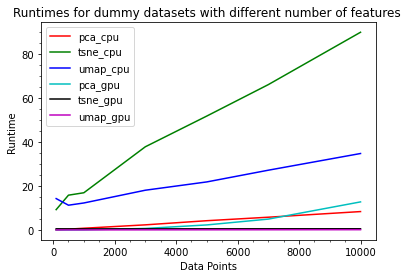

In [29]:
plt.plot(all_runtimes["nr_features"], all_runtimes["pca_cpu"],  color='r', label='pca_cpu')
plt.plot(all_runtimes["nr_features"], all_runtimes["tsne_cpu"],  color='g', label='tsne_cpu')
plt.plot(all_runtimes["nr_features"], all_runtimes["umap_cpu"], color='b', label='umap_cpu')
plt.plot(all_runtimes["nr_features"], all_runtimes["pca_gpu"],  color='c', label='pca_gpu')
plt.plot(all_runtimes["nr_features"], all_runtimes["tsne_gpu"], color='k', label='tsne_gpu')
plt.plot(all_runtimes["nr_features"], all_runtimes["umap_gpu"], color='m', label='umap_gpu')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Data Points")
plt.ylabel("Runtime")
plt.title("Runtimes for dummy datasets with different number of features ")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
plt.minorticks_on()
# To load the display window
plt.savefig('runtimes_dummy_data.png')
plt.show()